In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import binom

In [2]:
#Hay una ruleta en un casino. La ruleta tiene 18 espacios rojos, 18 espacios negros y dos espacios verdes
#Al girar la ruleta si sale rojo el aportador gana USD1, caso contrario el apostador pierde USD1
#Desde el punto de vista del casino, si sale rojo el casino pierde USD1 y caso contrario el casino gana USD1
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2

#Simular 1000 estracciones
#Cuanto gana o pierde el casino al final del experimento 


In [3]:

random.seed(2024)
# Definir la ruleta
ruleta = ["rojo"]*18 + ["negro"]*18 + ["verde"]*2
ganancia_casino = 0
for _ in range(1000):
    resultado = random.choice(ruleta)
    if(resultado == "rojo"):
        ganancia_casino -=1
    else:
        ganancia_casino +=1
print(f"Al final del experimento, el casino {'gana' if ganancia_casino > 0 else 'pierde'} USD{abs(ganancia_casino)}")

Al final del experimento, el casino gana USD18


In [25]:
def roullete_spin(spins=1000,roullete=ruleta):
    earnings = 0
    for _ in range(spins):
        result = random.choice(roullete)
        if result == "rojo":
            earnings -=1
        else:
            earnings +=1
    return earnings

In [26]:
roullete_spin()

72

In [27]:
#Samplin model
samplings = []
for _ in range(10000):
    samplings.append(roullete_spin())

In [28]:
samplings

[34,
 68,
 68,
 60,
 52,
 40,
 66,
 82,
 42,
 50,
 110,
 26,
 110,
 32,
 12,
 18,
 80,
 -4,
 -26,
 34,
 30,
 108,
 6,
 8,
 22,
 50,
 88,
 20,
 78,
 104,
 -12,
 114,
 36,
 18,
 80,
 12,
 -6,
 24,
 116,
 78,
 82,
 110,
 20,
 80,
 92,
 94,
 88,
 80,
 88,
 50,
 46,
 40,
 84,
 20,
 50,
 46,
 76,
 118,
 60,
 82,
 72,
 42,
 22,
 -4,
 64,
 52,
 54,
 54,
 16,
 96,
 38,
 28,
 74,
 106,
 78,
 36,
 76,
 78,
 50,
 30,
 38,
 30,
 106,
 56,
 38,
 68,
 56,
 98,
 2,
 34,
 42,
 42,
 56,
 36,
 16,
 86,
 100,
 64,
 64,
 22,
 48,
 60,
 48,
 50,
 88,
 54,
 104,
 96,
 48,
 34,
 62,
 122,
 46,
 12,
 48,
 8,
 36,
 110,
 56,
 64,
 34,
 30,
 46,
 14,
 40,
 40,
 38,
 62,
 102,
 72,
 -2,
 34,
 50,
 26,
 68,
 56,
 78,
 52,
 80,
 60,
 78,
 74,
 12,
 66,
 28,
 46,
 22,
 46,
 46,
 32,
 68,
 62,
 16,
 50,
 60,
 36,
 136,
 26,
 80,
 50,
 -2,
 64,
 28,
 54,
 50,
 30,
 -8,
 118,
 100,
 58,
 84,
 30,
 48,
 54,
 36,
 38,
 -4,
 68,
 70,
 -2,
 72,
 64,
 24,
 12,
 98,
 30,
 42,
 66,
 52,
 38,
 152,
 118,
 56,
 62,
 44,
 68,
 6

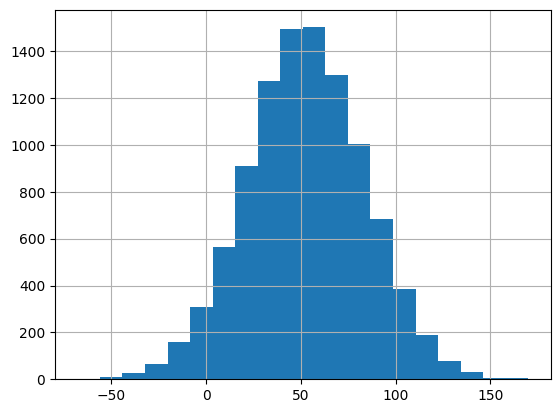

In [29]:
#Plot frecuencies histogram

plt.hist(samplings, bins=20)
plt.grid(True)
plt.show()

In [30]:
#Standard Error
std = np.std(samplings)
std

np.float64(31.485564168361346)

In [31]:
n = len(samplings)
n

10000

In [32]:
#Standard Error 
std/np.sqrt(n)

np.float64(0.31485564168361346)

In [ ]:
#Bernoulli Distribution: Es una probabilidad de distribución discreta de una variable aleatoria que toma el valor de 1 con probabilidad "P" y el valor 0 con Probabilidad 1-P
#Un ejemplo básico es el lanzamiento de una moneda dónde "P" = 0.5 para cara (1), y 0.5 para sello(0) E[X] = 0.5, BAR[X] = 0.25
#El segundo ejemplo es Obtener 5 o 6 en un lanzamiento de dados, dónde acertar(1) tiene la probabilidad 2/6 y la probabilidad de fallar(0) es 4/6
#El valor esperado E[X] es "P" y la varianza BAR[X] = P * (1-P

In [ ]:
#Binomial Distribution: es una distribución de probabilidad discreta del número de exitos en una secuencia de "n" experimentos independientes Bernoulli dónde el éxito tiene probabilidad P y el fracaso 1-P
#Probabilidad de sacar 3 caras en el lanzamiento de cuatro monedas, cada lanzamiento de moneda es un evento Bernoulli independiente de los otros lanzamientos 
#Formula: P(X=k) = 

$P(X=k) = {n\choose k} P^k*(1-p)^{n-k}$

${n\choose k} = n!/(k! * n-k!)$
$n! = n * (n-1) * (n-2)... * 1$

In [ ]:
#El Valor esperado de la distribución binomial E[X] = n*p y la varianza es VAR[X] = n*p * (1-p)

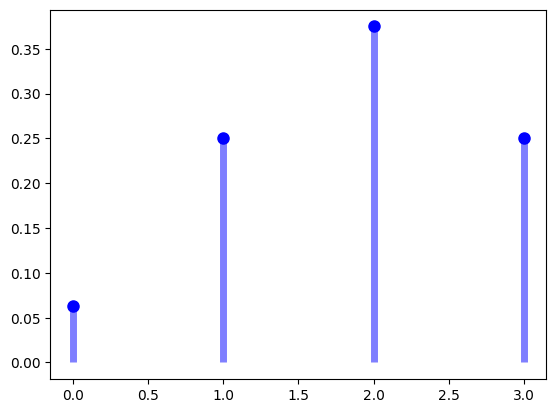

In [37]:
#Existe un evento "n" que es la probalidad de sacar 3 caras en el lanzamiento de 4 monedas
n, p = 4, 0.5
rv = binom(n, p)
fig, ax = plt.subplots(1,1)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), "bo", ms=8, label="Función de probabilidad masa")
ax.vlines(x, 0, binom.pmf(x, n, p), colors = "b", lw = 5, alpha = 0.5)
plt.show()

In [ ]:
# Es una distribución de probabilidad discreta que expresa la probabilidad de que un número dado de eventos ocurra en un intervalo fijo de tiempo a una tasa media constante(lambda)

$$P(X = k) =\frac{ \lambda^k * e^{-\lambda}} {k!}$$

In [ ]:
#El valor esperado de E[X] = lambda y la Varianza VAR[X] = lambda

In [ ]:
#Normal distribution: es una distribución de probabilidad continua para una variable aleatoria en el espacio continuo y esta representada por su media "mu" y su desviación estandar "sigma"

$$P(X = \mu\sigma) = \frac{1}{sqrt}{2\pi\sigma^2} * e^{\frac{-(x-\mu)^2}{2\sigma^2}}$$

In [ ]:
El Valor esperado E[X] = Mu y la Varianza VAR[X] = sigma al cuadrado